# Image Acquisiton Animations

In this notebook we produce gifs to visualize how the images were taken

In [1]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio

We will produce a gif showing each of the 200 frames taken with the color image alongside the depth image as shown below

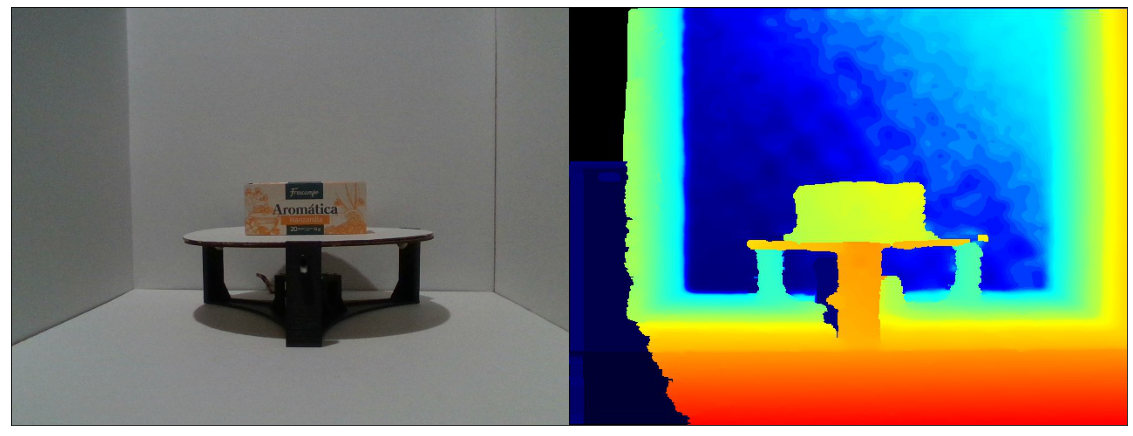

In [2]:
color_sample = cv2.cvtColor(cv2.imread('img/aromaticas/front_color_0.jpg'),
                            cv2.COLOR_BGR2RGB)
depth_sample = cv2.cvtColor(cv2.imread('img/aromaticas/front_depth_jet_0.jpg'),
                            cv2.COLOR_BGR2RGB)

stacked = np.hstack((color_sample, depth_sample))

plt.figure(figsize=(20,10))
plt.imshow(stacked)
plt.xticks([])
plt.yticks([])
plt.show()

We will iterate over the folders for each object. We must write to disk the stacked frames as matplotlib figures and then use this images to make the gif. These are the classes of our dataset so far

In [3]:
class_names = os.listdir('img')
class_names

['brownie',
 'cafe',
 'galletas',
 'jugo',
 'aromaticas',
 'hueso',
 'pepino',
 'pimenton',
 'naranja',
 'limon',
 'esponja',
 'desodorante']

In [4]:
import time

if not os.path.exists('gifs'): 
    os.mkdir('gifs')

plt.figure(figsize=(20,10))
    
for c in class_names:
    path = os.path.join('img', c)
    color_paths = [x for x in os.listdir(path) if re.search('color', x)]
    depth_paths = [x for x in os.listdir(path) if re.search('depth', x)]

    for view in ('front', 'mid', 'high'):
        start = time.time()
        with imageio.get_writer(os.path.join('gifs', f'{c}_{view}.gif'), mode='I') as writer:
            for i in range(200):
                color_path = os.path.join(path, f'{view}_color_{i}.jpg')
                depth_path = os.path.join(path, f'{view}_depth_jet_{i}.jpg')
                
                color = cv2.resize(imageio.imread(color_path), (320, 240))
                depth = cv2.resize(imageio.imread(depth_path), (320, 240))

                stacked = np.hstack((color, depth))
                writer.append_data(stacked)
            
        exec_time = time.time() - start
        print(f'gif for {c} from {view} view took: {exec_time//60:.0f}:{int(exec_time%60):0>2}')

gif for brownie from front view took: 0:13
gif for brownie from mid view took: 0:12
gif for brownie from high view took: 0:12
gif for cafe from front view took: 0:14
gif for cafe from mid view took: 0:14
gif for cafe from high view took: 0:14
gif for galletas from front view took: 0:15
gif for galletas from mid view took: 0:15
gif for galletas from high view took: 0:14
gif for jugo from front view took: 0:13
gif for jugo from mid view took: 0:12
gif for jugo from high view took: 0:12
gif for aromaticas from front view took: 0:14
gif for aromaticas from mid view took: 0:12
gif for aromaticas from high view took: 0:12
gif for hueso from front view took: 0:12
gif for hueso from mid view took: 0:12
gif for hueso from high view took: 0:12
gif for pepino from front view took: 0:13
gif for pepino from mid view took: 0:13
gif for pepino from high view took: 0:12
gif for pimenton from front view took: 0:14
gif for pimenton from mid view took: 0:14
gif for pimenton from high view took: 0:12
gif 

<Figure size 1440x720 with 0 Axes>

Optimize gifs to reduce space on disk

In [6]:
from pygifsicle import optimize

for gif in os.listdir('gifs'):
    print('optimizing', gif)
    optimize(os.path.join('gifs', gif))

optimizing naranja_mid.gif
optimizing limon_mid.gif
optimizing galletas_front.gif
optimizing esponja_high.gif
optimizing pimenton_high.gif
optimizing esponja_mid.gif
optimizing pepino_high.gif
optimizing esponja_front.gif
optimizing pepino_front.gif
optimizing aromaticas_high.gif
optimizing jugo_high.gif
optimizing desodorante_high.gif
optimizing aromaticas_mid.gif
optimizing hueso_mid.gif
optimizing cafe_mid.gif
optimizing limon_high.gif
optimizing pimenton_front.gif
optimizing hueso_high.gif
optimizing hueso_front.gif
optimizing galletas_high.gif
optimizing jugo_mid.gif
optimizing galletas_mid.gif
optimizing brownie_mid.gif
optimizing naranja_front.gif
optimizing desodorante_front.gif
optimizing jugo_front.gif
optimizing desodorante_mid.gif
optimizing aromaticas_front.gif
optimizing limon_front.gif
optimizing naranja_high.gif
optimizing brownie_front.gif
optimizing pepino_mid.gif
optimizing cafe_front.gif
optimizing brownie_high.gif
optimizing cafe_high.gif
optimizing pimenton_mid.gi